In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

%matplotlib inline
sns.set_style('whitegrid')

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Description of Variables

The dataset contains 6366 observations of 9 variables:

* `rate_marriage`: woman's rating of her marriage (1 = very poor, 5 = very good)
* `age`: woman's age
* `yrs_married`: number of years married
* `children`: number of children
* `religious`: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
* `educ`: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
* `occupation`: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
* `occupation_husb`: husband's occupation (same coding as above)
* `affairs`: time spent in extra-marital affairs

## Problem Statement

I decided to treat this as a classification problem by creating a new binary variable `affair` (did the woman have at least one affair?) and trying to predict the classification for each woman.

In [2]:
dta = sm.datasets.fair.load_pandas().data

# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)

In [3]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [4]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [5]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [6]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


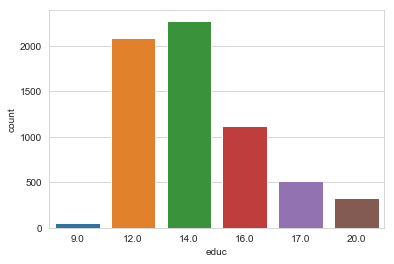

In [7]:
sns.countplot(dta.educ)

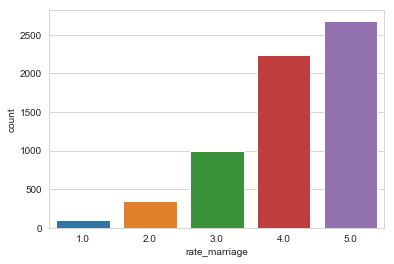

In [8]:
sns.countplot(dta.rate_marriage)

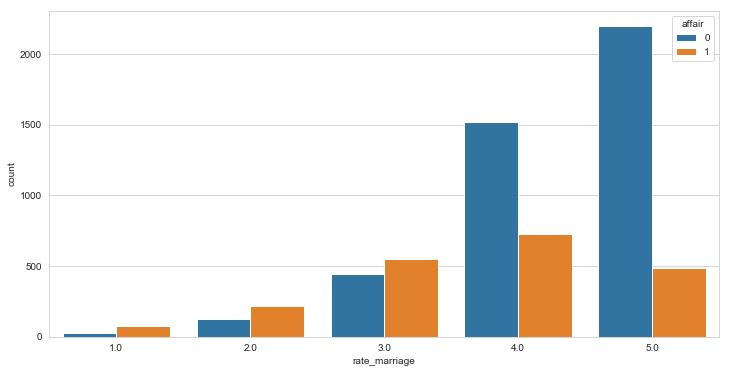

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(data=dta, x='rate_marriage', hue='affair')

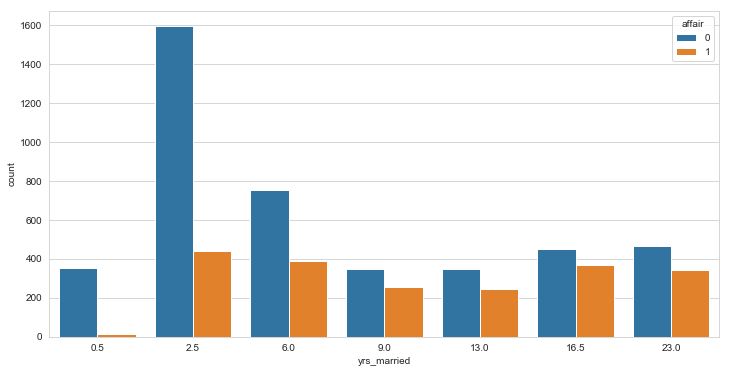

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(data=dta, x='yrs_married', hue='affair')

In [11]:
dta= pd.get_dummies(dta, columns =['occupation'], drop_first=True)
dta= pd.get_dummies(dta, columns =['occupation_husb'], drop_first=True)

In [12]:
dta.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'affairs', 'affair', 'occupation_2.0', 'occupation_3.0',
       'occupation_4.0', 'occupation_5.0', 'occupation_6.0',
       'occupation_husb_2.0', 'occupation_husb_3.0', 'occupation_husb_4.0',
       'occupation_husb_5.0', 'occupation_husb_6.0'],
      dtype='object')

In [13]:
X= dta.drop(['affair', 'affairs'], axis=1)

In [14]:
X.insert(0, 'Intercept', 1)
#X['Intercept'] =1

In [15]:
y = dta['affair']

In [16]:
X.head()

,Intercept,rate_marriage,age,yrs_married,children,religious,educ,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0
0,1,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,1,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,1,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,1,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [18]:
lm = LogisticRegression()
lm.fit(X_train,y_train)
lm.score(X_train,y_train)

0.7241921005385996

In [19]:
lm.score(X_test,y_test)

0.725130890052356

In [20]:
y.mean(), y_train.mean(), y_test.mean()

(0.3224945020420987, 0.3197935368043088, 0.3287958115183246)

In [21]:
np.array(X.columns.tolist()).shape, np.transpose(lm.coef_).shape

((17,), (17, 1))

In [22]:
df_coef = pd.DataFrame(data=np.transpose(lm.coef_), index=X.columns)

In [89]:
df_coef

,0
Intercept,1.531441
rate_marriage,-0.710034
age,-0.059971
yrs_married,0.104923
children,0.012510
religious,-0.387801
educ,-0.001474
occupation_2.0,0.417248
occupation_3.0,0.688148
occupation_4.0,0.465850


In [23]:
y_pred = lm.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [24]:
probs = lm.predict_proba(X_test)
probs

array([[0.85245754, 0.14754246],
       [0.85892045, 0.14107955],
       [0.66897403, 0.33102597],
       ...,
       [0.28615188, 0.71384812],
       [0.61983203, 0.38016797],
       [0.68143441, 0.31856559]])

In [25]:
metrics.accuracy_score(y_test,y_pred), metrics.roc_auc_score(y_test,probs[:,1])

(0.725130890052356, 0.7393292228504427)

In [26]:
metrics.confusion_matrix(y_test, y_pred)

array([[1162,  120],
       [ 405,  223]], dtype=int64)

In [27]:
print(metrics.classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.74      0.91      0.82      1282
          1       0.65      0.36      0.46       628

avg / total       0.71      0.73      0.70      1910



In [28]:
scores = cross_val_score(lm,X,y,cv=10)
scores

array([0.72100313, 0.70219436, 0.73824451, 0.70597484, 0.70597484,
       0.72955975, 0.7327044 , 0.70440252, 0.75157233, 0.75      ])

In [29]:
lm

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
help(lm)

Help on LogisticRegression in module sklearn.linear_model.logistic object:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
import time
def GridSearch_BestParam(X, y, clf, param_grid):
    cv_sets = ShuffleSplit(X.shape[0],n_iter=10,
                           test_size=0.20,
                           random_state=1234)
    
    grid_search = GridSearchCV(clf,
                              param_grid=param_grid,
                              cv=cv_sets)
    start= time.time()
    print(start)
    grid_search.fit(X,y)
    end = time.time()
    print(end)
    #top_params=grid_search.grid_scores_
    #top_params=grid_search.best_scores_
    top_params=grid_search.best_params_
    return top_params

In [32]:
param_grid = {'C':[0.001,0.05,0.1],
              'penalty':['l2'],
              'solver':['newton-cg','lbfgs','liblinear']}
top_para = GridSearch_BestParam(X_train, y_train, lm, param_grid)

1547510875.8997421
1547510880.9216146


In [33]:
top_para

{'C': 0.05, 'penalty': 'l2', 'solver': 'newton-cg'}

In [36]:
lm1= LogisticRegression(C=top_para['C'],penalty=top_para['penalty'],solver=top_para['solver'])

In [37]:
scores = cross_val_score(lm1,X,y,scoring='accuracy', cv=10)
scores

array([0.72257053, 0.70376176, 0.73981191, 0.70754717, 0.70440252,
       0.72955975, 0.72798742, 0.70440252, 0.75157233, 0.75157233])

In [38]:
lm1.fit(X_train,y_train)
y_pred = lm1.predict(X_test)

In [39]:
y1_pred = np.where(lm1.predict_proba(X_test)[:,1] > 0.35,1,0)
print(metrics.classification_report(y_test,y1_pred))

             precision    recall  f1-score   support

          0       0.79      0.75      0.77      1282
          1       0.54      0.60      0.57       628

avg / total       0.71      0.70      0.70      1910



In [40]:
X.head()

,Intercept,rate_marriage,age,yrs_married,children,religious,educ,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0
0,1,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,1,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,1,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,1,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [41]:
X= pd.get_dummies(X, columns =['rate_marriage'], drop_first=True)
X= pd.get_dummies(X, columns =['religious'], drop_first=True)

In [42]:
X= pd.get_dummies(X, columns =['children'], drop_first=True)

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [44]:
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)

In [45]:
y1_pred = np.where(lm.predict_proba(X_test)[:,1] > 0.368,1,0)
print(metrics.classification_report(y_test,y1_pred))

             precision    recall  f1-score   support

          0       0.80      0.76      0.78      1074
          1       0.55      0.61      0.58       518

avg / total       0.72      0.71      0.72      1592



In [46]:
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

[[949 125]
 [308 210]]
             precision    recall  f1-score   support

          0       0.75      0.88      0.81      1074
          1       0.63      0.41      0.49       518

avg / total       0.71      0.73      0.71      1592



In [47]:
X.head()

,Intercept,age,yrs_married,educ,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_husb_2.0,...,rate_marriage_4.0,rate_marriage_5.0,religious_2.0,religious_3.0,religious_4.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.5
0,1,32.0,9.0,17.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,27.0,13.0,14.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,22.0,2.5,16.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,37.0,16.5,16.0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
4,1,27.0,9.0,14.0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [48]:
X.age.value_counts()

27.0    1931
22.0    1800
32.0    1069
42.0     793
37.0     634
17.5     139
Name: age, dtype: int64

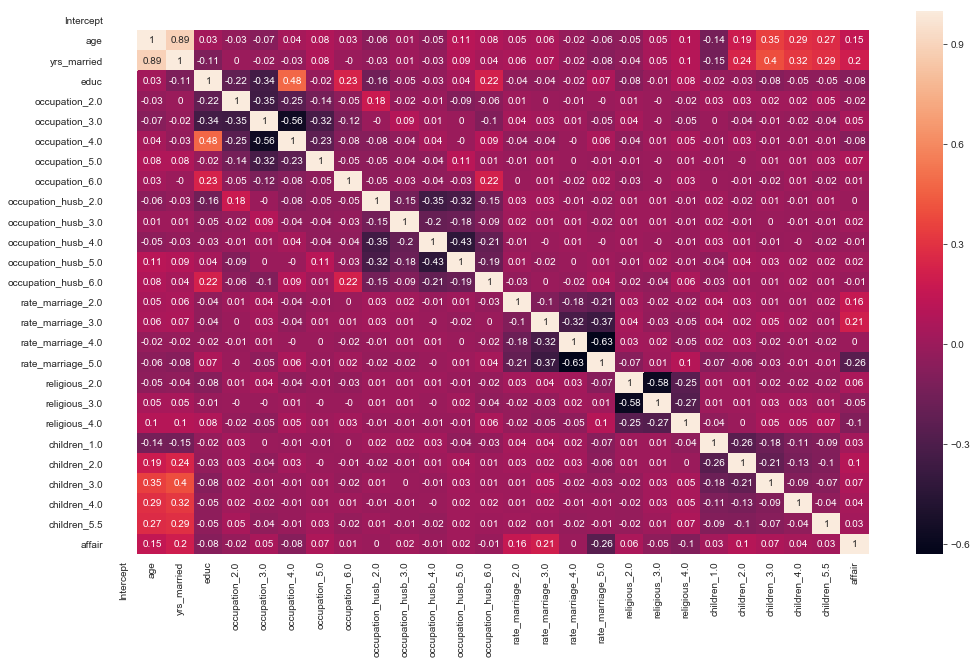

In [49]:
plt.figure(figsize=(17,10))
sns.heatmap(np.round(pd.concat([X,y],axis=1).corr(),2), annot=True)

In [182]:
# occupation_4 and educ--> 0.48
# yrs_married and age--> 0.89
# occupation_4 and occupation_3-->-0.56

In [50]:
def PolyFeatureNames(featureNames):
    # interaction features
    featureNames = ['intercept'] + featureNames    
    polyFeatureNames = [];    
    for i,x in enumerate(featureNames):
        for y in featureNames[i:]:
            if (x == 'intercept'):
                polyFeatureNames.append(y)
            elif (x==y):
                polyFeatureNames.append((y+'_Square'))
            else:
                polyFeatureNames.append((x+'_'+y))
    return polyFeatureNames

In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, interaction_only=False)

In [52]:
Xpoly = poly.fit_transform(X.drop('Intercept',axis=1))

In [53]:
Xpoly.shape

(6366, 351)

In [54]:
polyFeatureNames = PolyFeatureNames(X.drop('Intercept',axis=1).columns.tolist())
#polyFeatureNames.pop(0)

In [55]:
XpolyDf = pd.DataFrame(Xpoly, columns=polyFeatureNames)

In [56]:
polyFeatureNames

['intercept',
 'age',
 'yrs_married',
 'educ',
 'occupation_2.0',
 'occupation_3.0',
 'occupation_4.0',
 'occupation_5.0',
 'occupation_6.0',
 'occupation_husb_2.0',
 'occupation_husb_3.0',
 'occupation_husb_4.0',
 'occupation_husb_5.0',
 'occupation_husb_6.0',
 'rate_marriage_2.0',
 'rate_marriage_3.0',
 'rate_marriage_4.0',
 'rate_marriage_5.0',
 'religious_2.0',
 'religious_3.0',
 'religious_4.0',
 'children_1.0',
 'children_2.0',
 'children_3.0',
 'children_4.0',
 'children_5.5',
 'age_Square',
 'age_yrs_married',
 'age_educ',
 'age_occupation_2.0',
 'age_occupation_3.0',
 'age_occupation_4.0',
 'age_occupation_5.0',
 'age_occupation_6.0',
 'age_occupation_husb_2.0',
 'age_occupation_husb_3.0',
 'age_occupation_husb_4.0',
 'age_occupation_husb_5.0',
 'age_occupation_husb_6.0',
 'age_rate_marriage_2.0',
 'age_rate_marriage_3.0',
 'age_rate_marriage_4.0',
 'age_rate_marriage_5.0',
 'age_religious_2.0',
 'age_religious_3.0',
 'age_religious_4.0',
 'age_children_1.0',
 'age_children_2.

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XpolyDf,y, test_size=0.3)
lm2 = LogisticRegression()
lm2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
y1_pred = np.where(lm2.predict_proba(X_test)[:,1] > 0.28,1,0)
print(metrics.classification_report(y_test,y1_pred))

             precision    recall  f1-score   support

          0       0.84      0.62      0.72      1298
          1       0.49      0.76      0.59       612

avg / total       0.73      0.66      0.68      1910



In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
import time
def GridSearch_BestParam(X, y, clf, param_grid):
    cv_sets = ShuffleSplit(X.shape[0],n_iter=10,
                           test_size=0.20,
                           random_state=1234)
    
    grid_search = GridSearchCV(clf,
                              param_grid=param_grid,
                              cv=cv_sets)
    start= time.time()
    print(start)
    grid_search.fit(X,y)
    end = time.time()
    print(end)
    #top_params=grid_search.grid_scores_
    #top_params=grid_search.best_scores_
    top_params=grid_search.best_params_
    return top_params

param_grid = {'C':[0.001,0.05,0.1],
              'penalty':['l2'],
              'solver':['newton-cg','lbfgs','liblinear'],
             'max_iter':[5000]}
top_para = GridSearch_BestParam(X_train, y_train, lm2, param_grid)

1547511183.334041
1547512015.175805


In [60]:
top_para

{'C': 0.001, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'lbfgs'}

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XpolyDf,y, test_size=0.3)
lm2 = LogisticRegression(C=top_para['C'],penalty=top_para['penalty'], solver=top_para['solver'], max_iter=top_para['max_iter'])
lm2.fit(X_train,y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
y1_pred = np.where(lm2.predict_proba(X_test)[:,1] > 0.32,1,0)
print(metrics.classification_report(y_test,y1_pred))

             precision    recall  f1-score   support

          0       0.83      0.67      0.74      1299
          1       0.50      0.71      0.59       611

avg / total       0.73      0.68      0.69      1910



TypeError: 'Figure' object does not support indexing

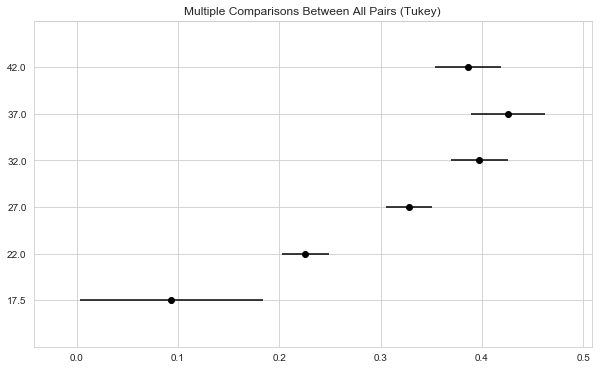

In [89]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
output = pairwise_tukeyhsd(y,X.age)
#df = pd.read_html(output.summary().as_html(),header=0)[0]
df = pd.DataFrame(data=output._results_table.data[1:], columns=output._results_table.data[0])
df1 = df[df.reject == False]
output.plot_simultaneous()[0]

In [64]:
X.head()

,Intercept,age,yrs_married,educ,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_husb_2.0,...,rate_marriage_4.0,rate_marriage_5.0,religious_2.0,religious_3.0,religious_4.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.5
0,1,32.0,9.0,17.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,27.0,13.0,14.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,22.0,2.5,16.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,37.0,16.5,16.0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
4,1,27.0,9.0,14.0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


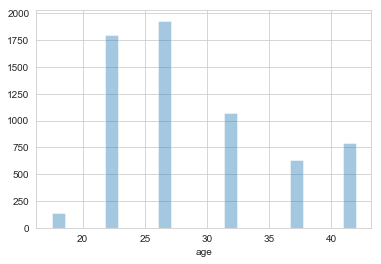

In [65]:
sns.distplot(dta.age, kde=False)

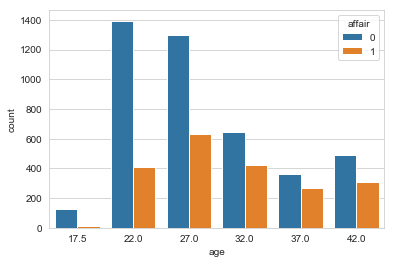

In [66]:
sns.countplot(data=dta, x='age', hue='affair')

In [67]:
dd = pd.qcut(X.age,q=[0,0.15,0.5,0.75,1], labels=[1,2,3,4])
dta = pd.concat(axis=1, objs=[dta,dd])

In [68]:
dd.value_counts()

1    1939
2    1931
4    1427
3    1069
Name: age, dtype: int64

In [345]:
dta.age.iloc[:,1]

0       3
1       2
2       1
3       4
4       2
5       2
6       4
7       4
8       1
9       2
10      2
11      2
12      4
13      2
14      1
15      4
16      2
17      4
18      4
19      4
20      1
21      4
22      4
23      2
24      2
25      2
26      2
27      4
28      3
29      2
       ..
6336    4
6337    2
6338    4
6339    3
6340    2
6341    2
6342    1
6343    1
6344    3
6345    2
6346    1
6347    1
6348    2
6349    4
6350    3
6351    1
6352    4
6353    1
6354    4
6355    2
6356    3
6357    3
6358    2
6359    1
6360    1
6361    3
6362    3
6363    1
6364    3
6365    1
Name: age, Length: 6366, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [69]:
X1= pd.get_dummies(dta.age.iloc[:,1], drop_first=True,prefix='age')
dta = pd.concat([dta,X1], axis=1)

In [70]:
dta.head()
del(dta['age'])

In [71]:
dta.head()

,rate_marriage,yrs_married,children,religious,educ,affairs,affair,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0,age_2,age_3,age_4
0,3.0,9.0,3.0,3.0,17.0,0.111111,1,1,0,0,0,0,0,0,0,1,0,0,1,0
1,3.0,13.0,3.0,1.0,14.0,3.230769,1,0,1,0,0,0,0,0,1,0,0,1,0,0
2,4.0,2.5,0.0,1.0,16.0,1.400000,1,0,1,0,0,0,0,0,0,1,0,0,0,0
3,4.0,16.5,4.0,3.0,16.0,0.727273,1,0,0,0,1,0,0,0,0,1,0,0,0,1
4,5.0,9.0,1.0,1.0,14.0,4.666666,1,0,1,0,0,0,0,0,1,0,0,1,0,0


In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dta.drop(['affairs','affair'],axis=1),y, test_size=0.3)
lm2 = LogisticRegression(C=top_para['C'],penalty=top_para['penalty'], solver=top_para['solver'], max_iter=top_para['max_iter'])
lm2.fit(X_train,y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
y1_pred = np.where(lm2.predict_proba(X_test)[:,1] > 0.27,1,0)
print(metrics.classification_report(y_test,y1_pred))

             precision    recall  f1-score   support

          0       0.85      0.50      0.63      1310
          1       0.42      0.81      0.55       600

avg / total       0.71      0.59      0.60      1910

